# IMPORTING DATA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


we will drop the CustomerID because it's not important

In [3]:
data = data.drop('CustomerID',axis =1)

In [4]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


we will check for any missing values

In [5]:
data.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


because we don't have we will continue by checking for duplicates

In [7]:
data.duplicated().sum()

0

some info about the data

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


a descriptive analysis of the data

In [20]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# SOME VISUALIZATIONS

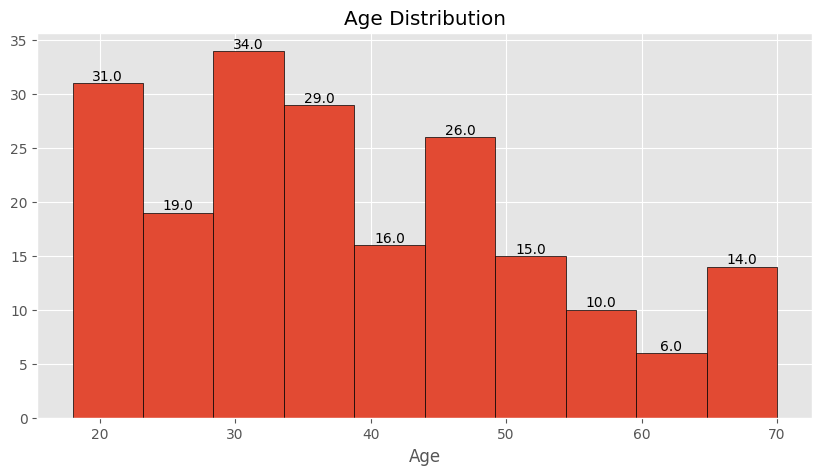

In [22]:
with plt.style.context('ggplot'):
 plt.figure(figsize=(10,5))
 counts,bins,patches  = plt.hist(data['Age'],edgecolor='black')
 for count, patch in zip(counts,patches):
   plt.text(patch.get_x()+patch.get_width()/2,count,f'{count}',ha='center',va='bottom',fontsize=10)
 plt.title('Age Distribution')
 plt.xlabel('Age')
 plt.show()

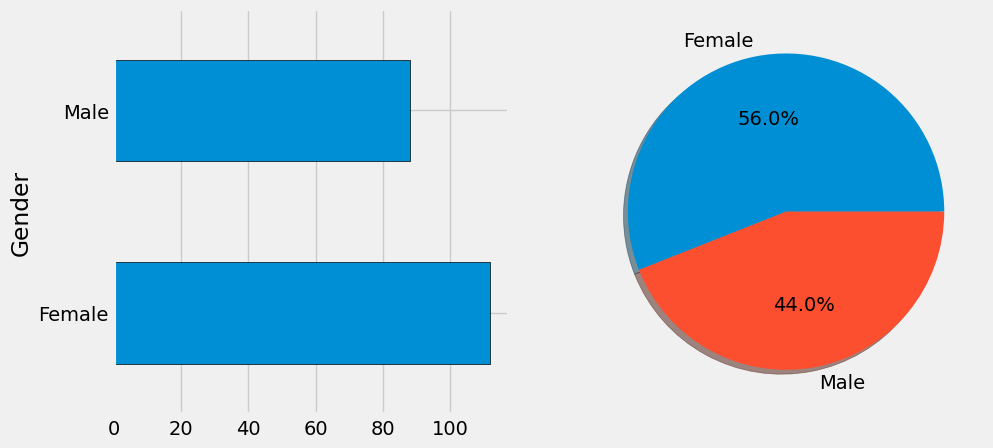

In [18]:

with plt.style.context('fivethirtyeight'):
 fig ,ax = plt.subplots(1,2,figsize=(10,5))
 sex = data['Gender'].value_counts()
 sex.plot(kind='barh',edgecolor='black',ax=ax[0])
 ax[1].pie(sex,labels = sex.index,autopct='%1.1f%%',shadow=True)
 plt.show()

the dataset contains more females than males as we can see from the plot above

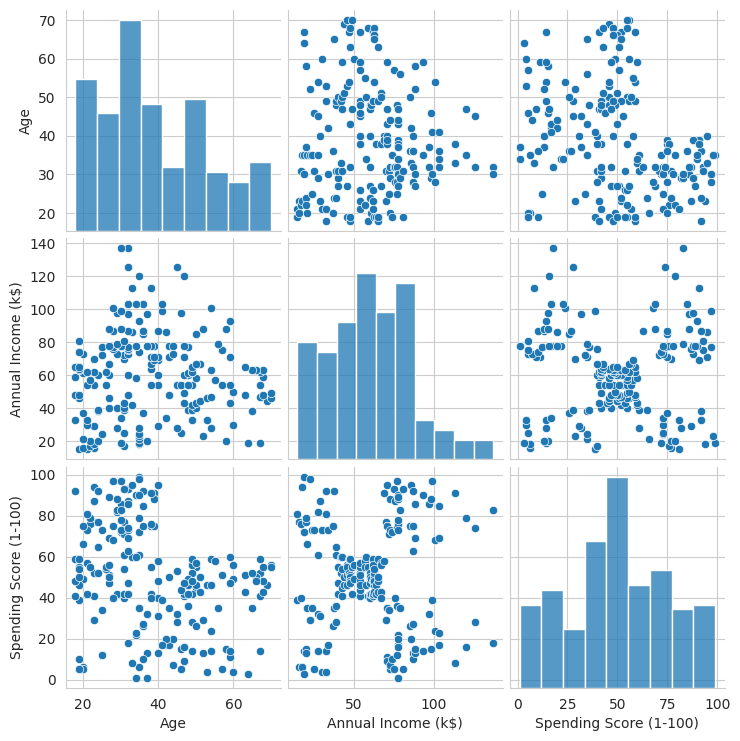

In [23]:
sns.set_style('whitegrid')
sns.pairplot(data)
plt.show()

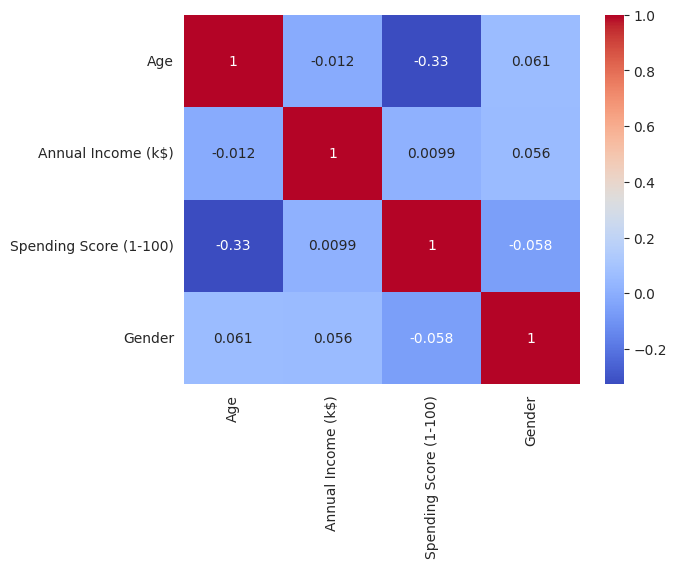

In [57]:
sex = pd.get_dummies(data['Gender'],drop_first=True)
data = pd.concat([data,sex['Male']],axis=1)
data = data.drop('Gender',axis=1)
data = data.rename(columns={'Male':'Gender'})

sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

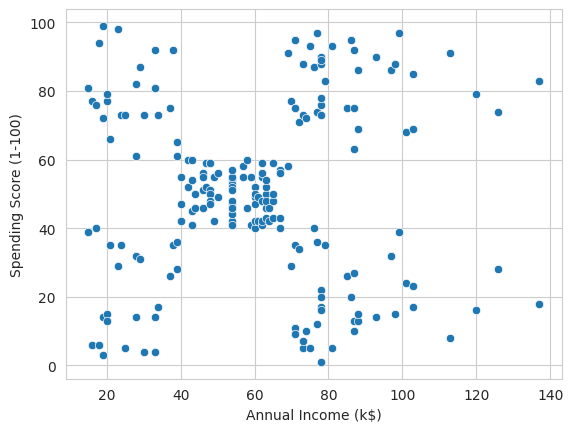

In [24]:
sns.set_style('whitegrid')
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)
plt.show()

**As we can see from the scatter plot above the dataset has noise so the DBSCAN clustering is not a good method here**

# K-MEANS CLUSTERING

for clustering we will use the Annual Income and Spending Score

In [85]:
from sklearn.cluster import KMeans , AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

x = data[['Annual Income (k$)','Spending Score (1-100)']]


In [86]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [87]:
x_pca = PCA(n_components=2).fit_transform(x)


we will do different ranges so that after that we can do the elbow rule:

Elbow Rule:  **the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.**

In [88]:
k_range = range(1,10)
sse = []
sse_pca = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(x)
  km_pca = KMeans(n_clusters=k)
  km_pca.fit(x_pca)
  sse.append(km.inertia_)
  sse_pca.append(km_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

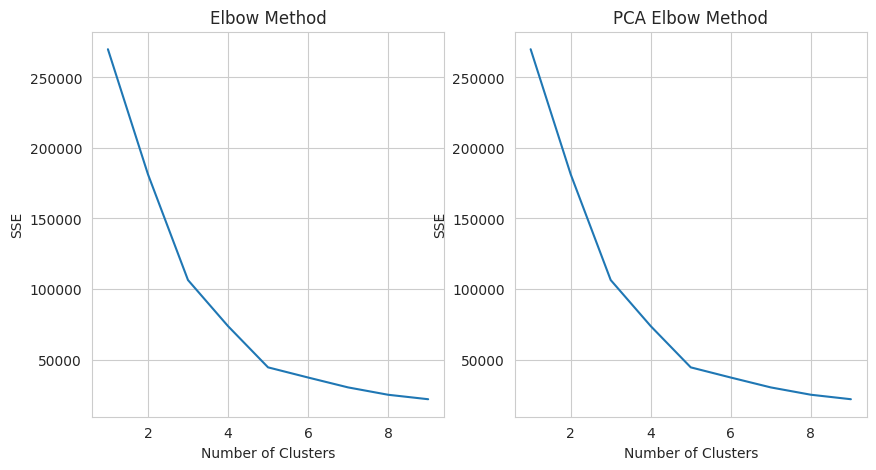

In [89]:
fig , ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(k_range,sse)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('SSE')
ax[0].set_title('Elbow Method')
ax[1].plot(k_range,sse_pca)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('SSE')
ax[1].set_title('PCA Elbow Method')
plt.show()

so as we can see from the plot the number of clusters that we will use is k=5

In [90]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(x)

km_pca = KMeans(n_clusters=5)
y_pred_pca = km_pca.fit_predict(x_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [91]:
km.cluster_centers_, km_pca.cluster_centers_


(array([[25.72727273, 79.36363636],
        [88.2       , 17.11428571],
        [86.53846154, 82.12820513],
        [55.2962963 , 49.51851852],
        [26.30434783, 20.91304348]]),
 array([[ -5.25882013,   0.7181953 ],
        [-25.99788487,  37.25515477],
        [ 33.42146589,  24.02699241],
        [ 18.02999543, -39.16060973],
        [-40.72039616, -19.31385163]]))

plotting the result with and without PCA

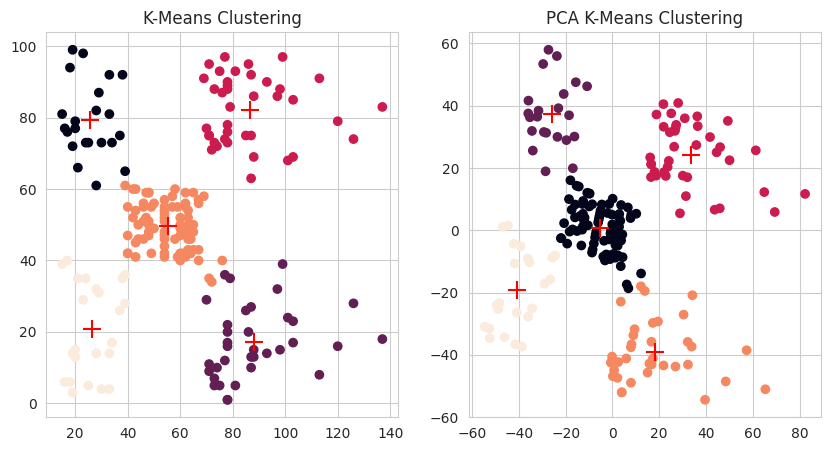

In [92]:
fig , ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c = y_pred)
ax[0].scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='+',s=150)
ax[0].set_title('K-Means Clustering')
ax[1].scatter(x_pca[:,0],x_pca[:,1],c = y_pred_pca)
ax[1].scatter(km_pca.cluster_centers_[:,0],km_pca.cluster_centers_[:,1],c='red',marker='+',s=150)
ax[1].set_title('PCA K-Means Clustering')
plt.show()

we will see the clustering score with silhouette_score

\n

In [93]:
from sklearn.metrics import silhouette_score
print("Before PCA: ",round(silhouette_score(x,y_pred),2))
print("After PCA: ",round(silhouette_score(x_pca,y_pred),2))

Before PCA:  0.55
After PCA:  0.55


#Hierarchical clustering

In [94]:
from sklearn.cluster import KMeans , AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

x = data[['Annual Income (k$)','Spending Score (1-100)']]

x_pca = PCA(n_components=2).fit_transform(x)

Without PCA ward 0.55
with PCA: ward 0.55


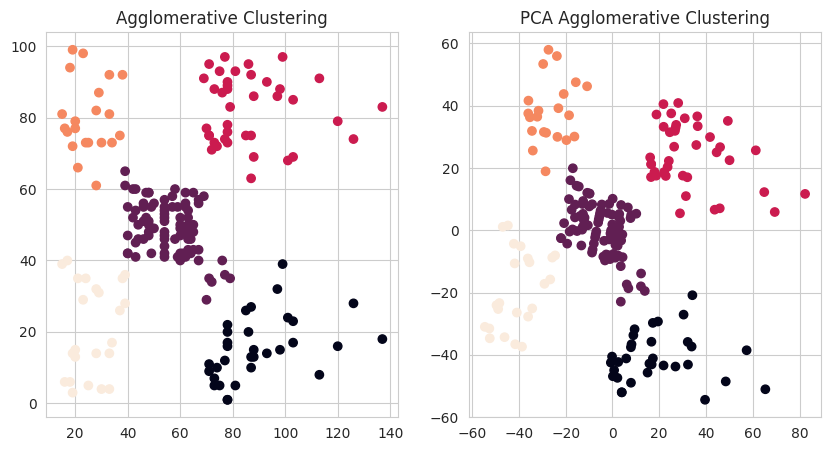

Without PCA complete 0.55
with PCA: complete 0.42


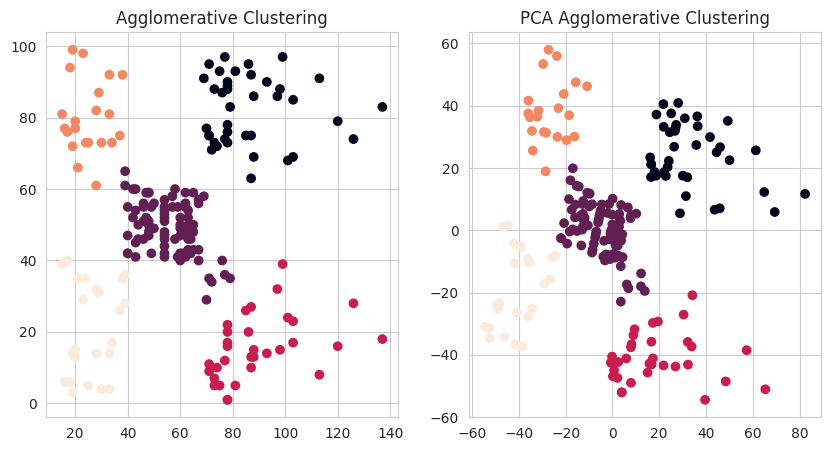

Without PCA average 0.48
with PCA: average 0.48


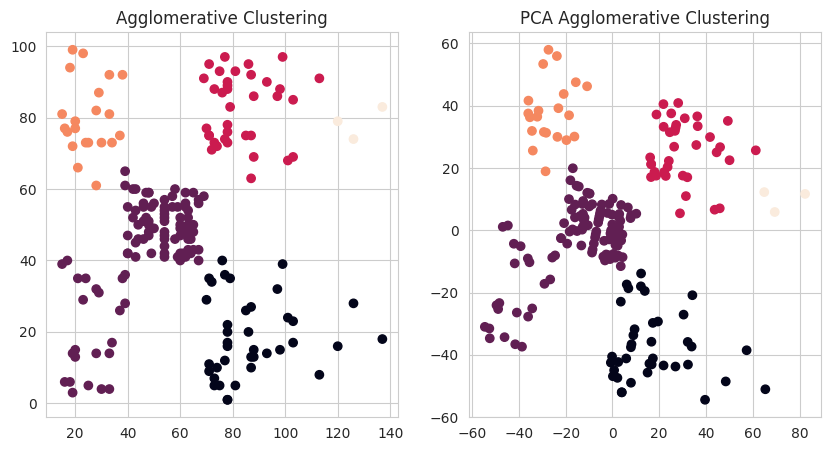

Without PCA single 0.27
with PCA: single 0.27


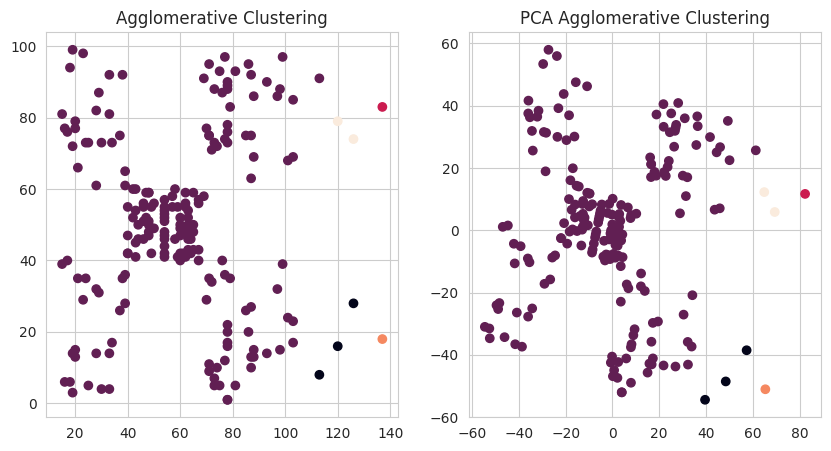

In [95]:
linkages = ['ward','complete','average','single']
for link in linkages:
    fig , ax = plt.subplots(1,2,figsize=(10,5))
    #normal x
    cluster = AgglomerativeClustering(n_clusters=5,linkage=link)
    y_pred = cluster.fit_predict(x)
    #x-PCA
    cluster_pca = AgglomerativeClustering(n_clusters=5,linkage=link)
    y_pred_pca = cluster.fit_predict(x_pca)
    #silhouette score normal x
    print("Without PCA", link,round(silhouette_score(x,y_pred),2))

    #silhouette score  x-PCA
    print("with PCA:",link,round(silhouette_score(x_pca,y_pred_pca),2))
    #plot normal x
    ax[0].scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c = y_pred)
    ax[0].set_title('Agglomerative Clustering')
    #plot x-PCA
    ax[1].scatter(x_pca[:,0],x_pca[:,1],c = y_pred)
    ax[1].set_title('PCA Agglomerative Clustering')
    plt.show()

**As we can the linkage 'ward' has the better silhouette score so we will continue with this**

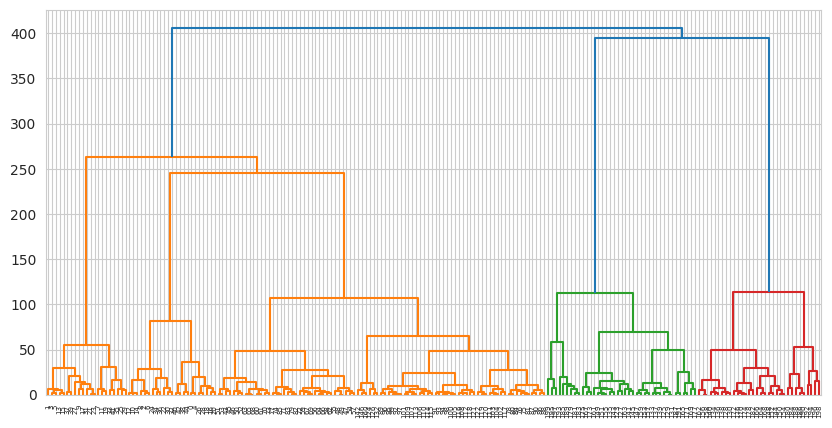

In [96]:
plt.figure(figsize=(10,5))
dendrogram(linkage(x,method = 'ward'))
plt.show()

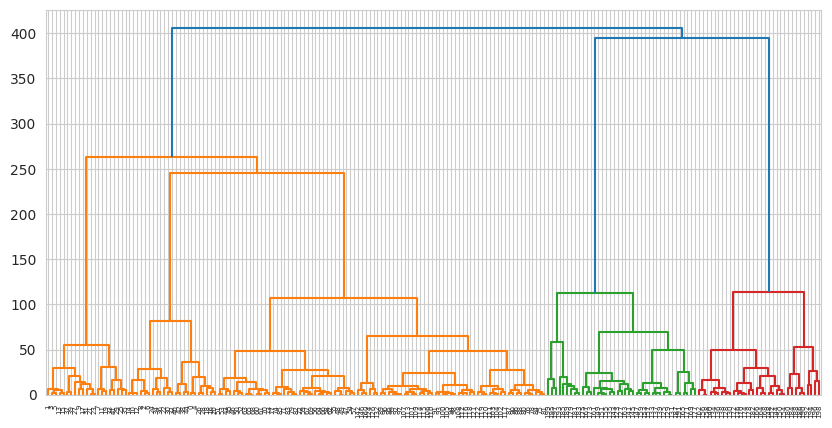

In [97]:
plt.figure(figsize=(10,5))
dendrogram(linkage(x_pca,method = 'ward'))
plt.show()

# Conclusion

As we can see both clusters have the same silhouette score so we can use both without any problem but i would prefer to use K-menas because it has better time complexity than hierarcical clustering
- **K-Means:**  O(n⋅k⋅d⋅i)
- **Hierarchical Clustering:**
1. Naive implementation:
O(n^3)
2. More efficient implementation:
O(n^2⋅logn)